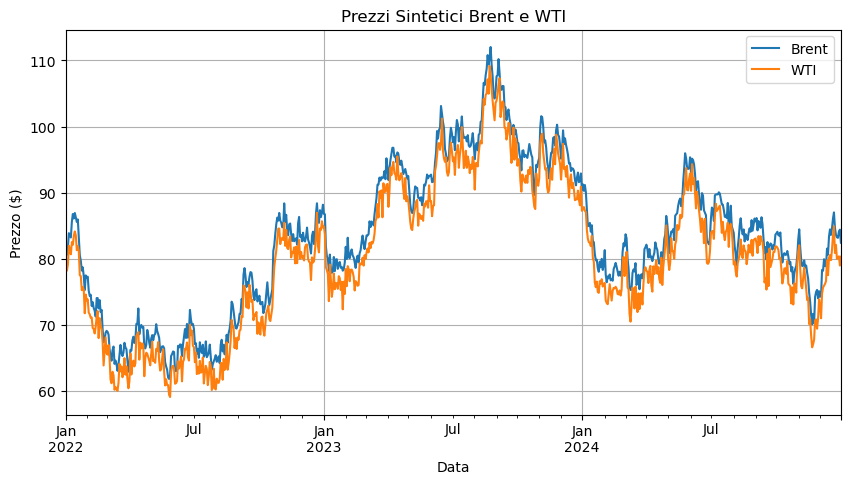

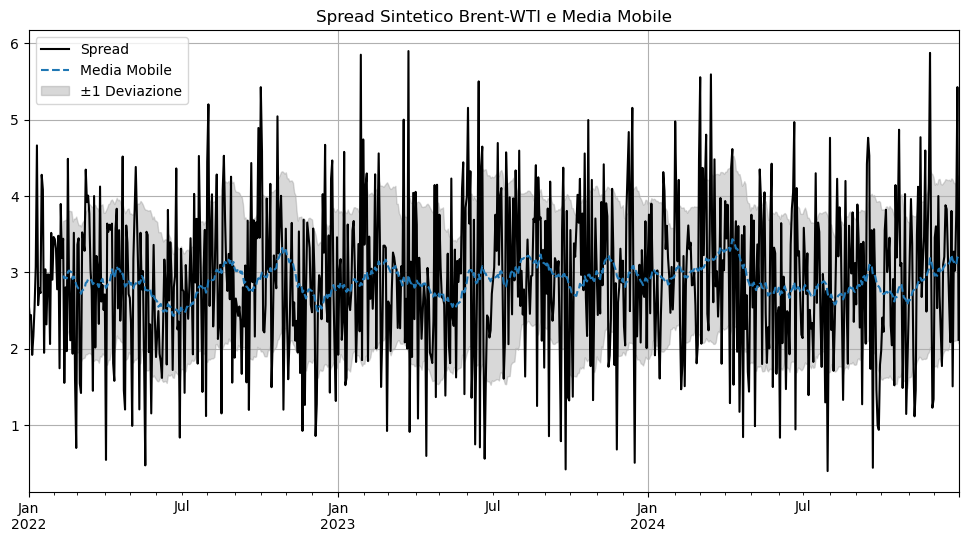

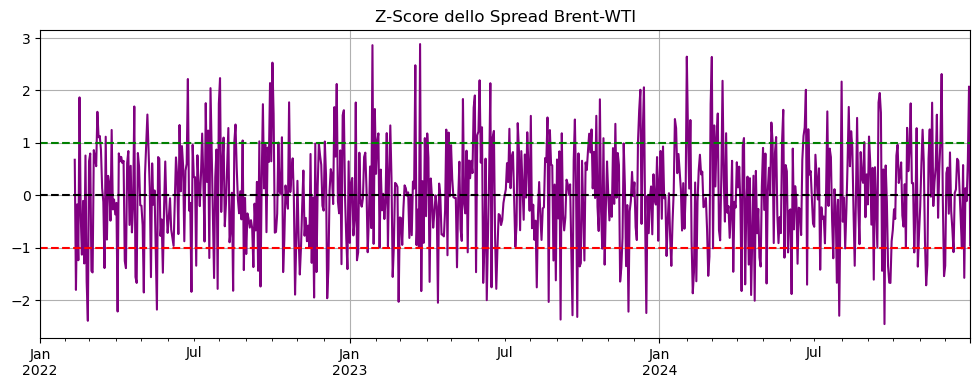

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Imposta parametri
np.random.seed(42)
dates = pd.date_range(start="2022-01-01", end="2024-12-31", freq='B')  # Giorni lavorativi
n = len(dates)

# Genera prezzi sintetici simili a Brent e WTI
brent_prices = np.cumsum(np.random.normal(loc=0.02, scale=1.5, size=n)) + 80
wti_prices = brent_prices - 3 + np.random.normal(loc=0, scale=1, size=n)

# Costruisci DataFrame
df = pd.DataFrame({
    "Brent": brent_prices,
    "WTI": wti_prices
}, index=dates)

df["Spread"] = df["Brent"] - df["WTI"]

# Calcola rolling mean e std per Z-Score
rolling_window = 30
df["Spread_Mean"] = df["Spread"].rolling(rolling_window).mean()
df["Spread_Std"] = df["Spread"].rolling(rolling_window).std()
df["Z-Score"] = (df["Spread"] - df["Spread_Mean"]) / df["Spread_Std"]

# Plot Prezzi
plt.figure(figsize=(10, 5))
df[["Brent", "WTI"]].plot(title="Prezzi Sintetici Brent e WTI", ax=plt.gca())
plt.xlabel("Data")
plt.ylabel("Prezzo ($)")
plt.grid()
plt.show()

# Plot Spread
plt.figure(figsize=(12, 6))
df["Spread"].plot(label="Spread", color='black')
df["Spread_Mean"].plot(label="Media Mobile", linestyle="--")
plt.fill_between(df.index, df["Spread_Mean"] + df["Spread_Std"],
                 df["Spread_Mean"] - df["Spread_Std"], alpha=0.3, color="gray", label="±1 Deviazione")
plt.title("Spread Sintetico Brent-WTI e Media Mobile")
plt.legend()
plt.grid()
plt.show()

# Plot Z-Score
plt.figure(figsize=(12, 4))
df["Z-Score"].plot(title="Z-Score dello Spread Brent-WTI", color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(1, color='green', linestyle='--')
plt.axhline(-1, color='red', linestyle='--')
plt.grid()
plt.show()